<a href="https://colab.research.google.com/github/snehaldhadge/MyLocation/blob/master/fashion_mnist_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.0.1)
1.13.1
Number of training examples: 60000
Number of test examples:     10000


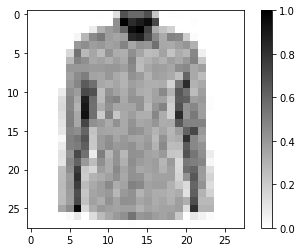

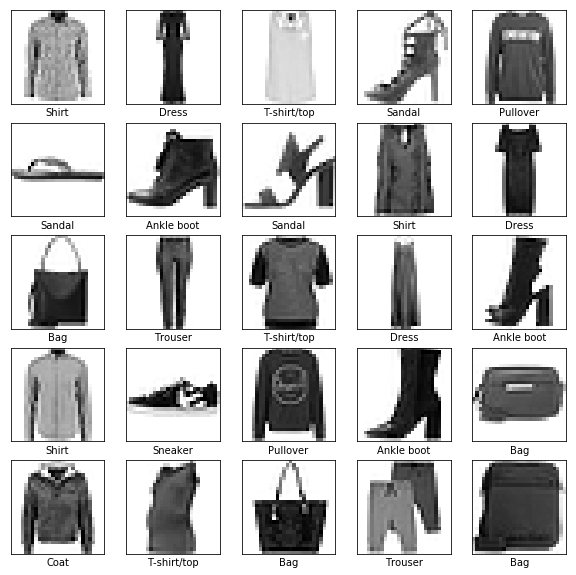

Epoch 1/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.4978 - acc: 0.8271
Epoch 2/5
1703/1875 [==========================>...] - ETA: 1s - loss: 0.3734 - acc: 0.8648

In [0]:
!pip install -U tensorflow_datasets
import tensorflow as tf
import tensorflow_datasets as tfds

tf.logging.set_verbosity(tf.logging.ERROR)

import math
import numpy as np
import matplotlib.pyplot as plt

# improves progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print(tf.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, the just comment out this line and run this cell again
tf.enable_eager_execution()  


dataset,metadataset = tfds.load("fashion_mnist",as_supervised=True,with_info=True)

train_dataset,test_dataset = dataset['train'],dataset['test']

#Labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

#displays number of samples in each
num_train_examples = metadataset.splits['train'].num_examples
num_test_examples = metadataset.splits['test'].num_examples
print("Number of training examples: {}".format(num_train_examples))
print("Number of test examples:     {}".format(num_test_examples))

#Preprocess the data
#The value of each pixel in the image data is an integer in the range [0,255]. 
#For the model to work properly, these values need to be normalized to the 
#range [0,1]. So here we create a normalization function, and then apply it to 
#each image in the test and train datasets.

def normalize(images,labels):
  images = tf.cast(images,tf.float32)
  images/= 255
  return images,labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)


#Plotting the image
# Take a single image, and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))

# Plot the image - voila a piece of fashion clothing
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

#Display first 25 images
plt.figure(figsize=(10,10))
i = 0
for (image, label) in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i += 1
plt.show()


#Build the Model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

#Flatten: converts2d data to 2d array
#"hidden" tf.keras.layers.Dense— A densely connected layer of 128 neurons. 
#Each neuron (or node) takes input from all 784 nodes in the previous layer, 
#weighting that input according to hidden parameters which will be learned
#during training, and outputs a single value to the next layer.

#output tf.keras.layers.Dense — A 10-node softmax layer, with each node 
#representing a class of clothing. As in the previous layer, each node takes
#input from the 128 nodes in the layer before it. Each node weights the input 
#according to learned parameters, and then outputs a value in the range [0, 1],
#representing the probability that the image belongs to that class. 
#The sum of all 10 node values is 1.

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Training the model
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)
#Repeat forever by specifying dataset.repeat()
#(the epochs parameter described below limits how long we perform training).
#The dataset.shuffle(60000) randomizes the order so our model cannot learn 
#anything from the order of the examples.
#And dataset.batch(32) tells model.fit to use batches of 32 images and 
#labels when updating the model variables.

model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

test_loss,test_accuracy = model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset:', test_accuracy)